In [1]:
#importing libraries
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv, LinAlgError

In [2]:
#loading the dataset into X matrix and y vector
X,y = load_boston(return_X_y=True)

In [3]:
#dividing into train and test dataset

X_train = np.zeros((400,X.shape[1] + 1))
X_train[:,0] = np.ones(400)
X_train[:,1:] = X[0:400,:]

y_train = y[0:400]
y_train.shape

X_test = X[400:, :]
temp = np.zeros((X_test.shape[0], X_test.shape[1] + 1))
temp[:,0] = np.ones(X_test.shape[0])
temp[:,1:] = X_test
X_test = temp

y_test = y[400:]

# Multiple regression using Normal Equation

In [4]:
XtX = np.dot(X_train.T, X_train)

try:
    XtXi = inv(XtX)
except LinAlgError:
    XtXi = pinv(XtX)

Xy = np.dot(X_train.T, y_train)

theta = np.dot(XtXi, Xy)

print(theta)

[ 2.86725996e+01 -1.91246374e-01  4.42289967e-02  5.52207977e-02
  1.71631351e+00 -1.49957220e+01  4.88773025e+00  2.60921031e-03
 -1.29480799e+00  4.84787214e-01 -1.54006673e-02 -8.08795026e-01
 -1.29230427e-03 -5.17953791e-01]


In [5]:
prediction = np.dot(X_test, theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 5.142232214464803
MSE 37.89377859959266


#  Multiple linear regression using gradient descent 

In [6]:
theta = np.random.uniform(0,1,size = X_train.shape[1])
epochs = 1000
learning_rate = 0.01

m = X_train.shape[0]
n = X_train.shape[1]
iteration = np.arange(epochs)
cost = np.zeros(epochs)

print(theta)

[0.7270238  0.22529043 0.35204368 0.28487417 0.87027257 0.96905763
 0.89781863 0.89089177 0.49813533 0.2255756  0.59710227 0.75088539
 0.5456619  0.53854202]


In [7]:
#performing gradient descent
for i in range(epochs):
    y_pred = np.dot(X_train,theta)
    error = y_pred - y_train
    theta = theta - (1/m)*learning_rate*np.dot(X_train.T,error)
    cost[i] = (1/2*m)*np.sum((error)**2)

C:\Users\labdh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


plotting without feature scaling

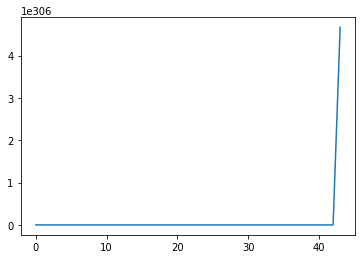

In [8]:
plt.plot(iteration, cost)

plotting after feature scaling using z-score normalisation

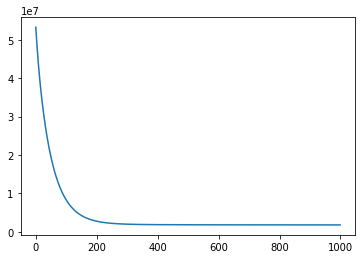

In [9]:
scaler = StandardScaler()

#find mu and sigma
scaler.fit(X_train[:,1:])

X_train[:, 1: ] = scaler.transform(X_train[:, 1:])
X_test[:, 1: ] = scaler.transform(X_test[:,1:])

theta = np.random.uniform(0,1,size = X_train.shape[1])

for i in range(epochs):
    y_pred = np.dot(X_train,theta)
    error = y_pred - y_train
    theta = theta - (1/m)*learning_rate*np.dot(X_train.T,error)
    cost[i] = (1/2*m)*np.sum((error)**2)
    
plt.plot(iteration, cost)

In [10]:
prediction = np.dot(X_test, theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 4.872347863986072
MSE 34.17415022404201


plotting after feature scaling using min max normalisation

In [11]:
minx = np.min(X_train[:,1:])
maxx = np.max(X_train[:,1:])

In [12]:
X_train[:,1:] = (X_train[:,1:] - minx)/(maxx - minx)
X_test[:,1:] = (X_test[:,1:] - minx)/(maxx - minx)

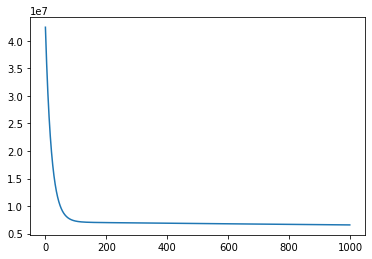

In [13]:
theta = np.random.uniform(0,1,size = X_train.shape[1])

for i in range(epochs):
    y_pred = np.dot(X_train,theta)
    error = y_pred - y_train
    theta = theta - (1/m)*learning_rate*np.dot(X_train.T,error)
    cost[i] = (1/2*m)*np.sum((error)**2)
    
plt.plot(iteration, cost)

In [14]:
prediction = np.dot(X_test, theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 8.910819035614624
MSE 103.04696380931166
